## ============================================================================
## CONTRIBUTIONS AND ACKNOWLEDGMENTS
## ============================================================================

## Author: Jordan M. Joseph, PhD
- This codebase was created to replicate calculations that Dr. Jordan Joseph performed in Excel and visualizations made using QGIS software. 
- Claude AI and GitHub Copilot was used to improve documentation throughout this codebase, including explanatory comments and function documentation (typehints, Google-style docstrings). 
- For questions, please contact Dr. Joseph via email: jordanjo@alumni.cmu.edu 

In [1]:
# ============================================================================
# STEP 0: Import libraries, set paths, and configure settings
# ============================================================================
"""
WHAT THIS CELL DOES:
This cell imports all the Python libraries we need and sets up our file paths.
Think of it as gathering all your tools before starting a project.

KEY LIBRARIES:
- pandas: For working with tabular data (like Excel spreadsheets)
- geopandas: For working with geographic data (maps and boundaries)
- numpy: For numerical calculations
- config: Our custom file that stores all file paths in one place

IMPORTANT: Always run this cell first! Nothing else will work without it.
"""

# Standard Python libraries for file handling
import os
import sys
from pathlib import Path

# Type hints - help catch errors before running code
from typing import Optional, List, Dict, Tuple

# Data processing libraries
import pandas as pd              # Tabular data (think: Excel)
import numpy as np               # Numerical calculations
import geopandas as gpd          # Geographic data (maps)

# Import our project-specific file paths
# (These are defined in config.py to keep things organized)
from config import (
    PROJECT_ROOT,               # Where this project lives on your computer
    RAW_DATA_DIR,               # Raw census data folder
    BOUNDARIES_DIR,             # Shapefiles for map boundaries
    MAPS_DIR,                   # Where we'll save finished maps
    LAYOUTS_DIR,                # For print-ready layouts
    RAW_CSV_2015,               # Path to 2015 census data
    RAW_CSV_2020,               # Path to 2020 census data
    RAW_CSV_2023,               # Path to 2023 census data
    TRACT_SHAPEFILE_2015,       # 2015 census tract boundaries
    TRACT_SHAPEFILE_2020,       # 2020 census tract boundaries
    TRACT_SHAPEFILE_2023,       # 2023 census tract boundaries
    STATE_SHAPEFILE_2015        # State boundaries for context
)

# Display settings
print_verbose = False  # Set to True if you want detailed progress messages
pd.set_option('display.max_columns', None)  # Show all columns in dataframes

print("✓ Setup complete - All libraries loaded and paths configured!")

Project root directory: c:\Users\jorda\Desktop\Projects\Scott_Trane_Grand_Challege\joseph-heating-fuel-analysis
✓ Setup complete - All libraries loaded and paths configured!


# Data Processing Pipeline

**WHAT WE'RE DOING HERE:**
We're transforming raw census data into analysis-ready format. Think of this as cleaning and organizing your data before making maps.

**PROCESS:**
1. **Load** raw CSV files from the NHGIS database
2. **Rename** columns to consistent, readable names (e.g., "ADQYE002" → "Natural_Gas")
3. **Calculate** what percentage of each census tract uses each fuel type
4. **Identify** which fuel is most common (dominant) in each tract
5. **Flag** any data quality issues (tracts with no data or ties)

**WHY SKIP ROW 1?**
These NHGIS files have a description row between the headers and data. We skip it to read the data correctly.

**OUTPUT:**
Three processed dataframes (one per year) with standardized columns ready for mapping.

In [2]:
# ============================================================================
# PROCESS HEATING FUEL DATA FOR ALL THREE YEARS
# ============================================================================
from scripts.process_data import process_heating_fuel_data

print("=" * 70)
print("STEP 1: LOADING RAW DATA")
print("=" * 70)

# Load raw census data files
# Note: We skip row 1 because NHGIS includes a description row
df_fuel_2015 = pd.read_csv(RAW_CSV_2015, skiprows=[1], low_memory=False)
df_fuel_2020 = pd.read_csv(RAW_CSV_2020, skiprows=[1], low_memory=False)
df_fuel_2023 = pd.read_csv(RAW_CSV_2023, skiprows=[1], low_memory=False)

print(f"✓ Loaded {len(df_fuel_2015):,} tracts for 2015")
print(f"✓ Loaded {len(df_fuel_2020):,} tracts for 2020")
print(f"✓ Loaded {len(df_fuel_2023):,} tracts for 2023")

print("\n" + "=" * 70)
print("STEP 2: PROCESSING DATA (calculating percentages & dominant fuels)")
print("=" * 70)

# Apply processing function to each year
# This function does all the heavy lifting (see process_data.py for details)
df_fuel_2015_processed = process_heating_fuel_data(df_fuel_2015, year=2015)
df_fuel_2020_processed = process_heating_fuel_data(df_fuel_2020, year=2020)
df_fuel_2023_processed = process_heating_fuel_data(df_fuel_2023, year=2023)

print("✓ 2015 processing complete")
print("✓ 2020 processing complete")
print("✓ 2023 processing complete")
print("\n" + "=" * 70)
print("✓ DATA PROCESSING COMPLETE - Ready for mapping!")
print("=" * 70)

STEP 1: LOADING RAW DATA
✓ Loaded 74,001 tracts for 2015
✓ Loaded 85,395 tracts for 2020
✓ Loaded 85,381 tracts for 2023

STEP 2: PROCESSING DATA (calculating percentages & dominant fuels)
✓ 2015 processing complete
✓ 2020 processing complete
✓ 2023 processing complete

✓ DATA PROCESSING COMPLETE - Ready for mapping!


In [3]:
# ============================================================================
# INSPECT PROCESSED DATA (Optional - helps understand what we created)
# ============================================================================
"""
UNDERSTANDING THE OUTPUT:
Let's look at what our processing created. Run this cell to see:
- What columns exist in our processed data
- Example data from one census tract and summary statistics
"""

print("COLUMN NAMES IN PROCESSED DATA:")
print("-" * 70)
for i, col in enumerate(df_fuel_2015_processed.columns, 1):
    print(f"{i:2d}. {col}")

example_tract = df_fuel_2015_processed.iloc[1000]  # Look at tract #1000

print(f"""

EXAMPLE: ONE CENSUS TRACT'S DATA:
----------------------------------------------------------------------
Location: {example_tract['County_Name']}, {example_tract['STATE']}
Total Housing Units: {example_tract['Total_Housing_Units']:,}
Dominant Fuel: {example_tract['Dom_Fuel_Type']}
Dominant Fuel Percentage: {example_tract['Dom_Fuel_Pct']}%

Fuel Type Breakdown:
  - Natural Gas: {example_tract['Pct_Natural_Gas']}%
  - Electricity: {example_tract['Pct_Electricity']}%
  - Fuel Oil: {example_tract['Pct_Fuel_Oil']}%
  - Wood: {example_tract['Pct_Wood']}%
  - Propane: {example_tract['Pct_Propane']}%

""")

COLUMN NAMES IN PROCESSED DATA:
----------------------------------------------------------------------
 1. GISJOIN
 2. YEAR
 3. STUSAB
 4. STATE
 5. STATEA
 6. COUNTY
 7. COUNTYA
 8. TRACTA
 9. GEOID
10. County_Name
11. Total_Housing_Units
12. Natural_Gas
13. Propane
14. Electricity
15. Fuel_Oil
16. Coal
17. Wood
18. Solar
19. Other
20. No_Fuel
21. FIPS_Code
22. Data_Quality_Check
23. Pct_Natural_Gas
24. Pct_Propane
25. Pct_Electricity
26. Pct_Fuel_Oil
27. Pct_Coal
28. Pct_Wood
29. Pct_Solar
30. Pct_Other
31. Pct_No_Fuel
32. Has_Dom_Tie
33. Dom_Fuel_Type
34. Dom_Fuel_Count
35. Dom_Fuel_Pct


EXAMPLE: ONE CENSUS TRACT'S DATA:
----------------------------------------------------------------------
Location: Census Tract 310, Russell County, Alabama, Alabama
Total Housing Units: 1,408
Dominant Fuel: Electricity
Dominant Fuel Percentage: 76.3%

Fuel Type Breakdown:
  - Natural Gas: 2.1%
  - Electricity: 76.3%
  - Fuel Oil: 0.0%
  - Wood: 3.3%
  - Propane: 18.3%




# STEP 3: Prepare Geographic Data for Mapping

Merge the processed data with geographic boundaries (shapefiles). This connects each census tract's heating fuel data to its actual location on a map.

**KEY CONCEPTS:**
- **Shapefile**: A geographic boundary file (like a digital map)
- **CRS (Coordinate Reference System)**: How we represent Earth's curved surface on a flat map
- **ESRI:102003**: A specific projection optimized for US maps (preserves area)
- **Merge**: Combining tabular data with geographic boundaries

**CREATE THREE GEODATAFRAMES:**
- `gdf_conus`: Contiguous United States (lower 48)
- `gdf_alaska`: Alaska separately (for inset positioning)
- `gdf_states`: State boundaries for reference lines

In [4]:
from scripts.process_data import prepare_geodataframe, FUEL_COLORS

print("=" * 70)
print("LOADING GEOGRAPHIC BOUNDARIES (SHAPEFILES)")
print("=" * 70)

# Load census tract boundaries for each year
# .to_crs() reprojects to US Contiguous Albers Equal Area (better for visualization)
print("Loading tract boundaries...")
gdf_tracts_2015 = gpd.read_file(TRACT_SHAPEFILE_2015).to_crs('ESRI:102003')
gdf_tracts_2020 = gpd.read_file(TRACT_SHAPEFILE_2020).to_crs('ESRI:102003')
gdf_tracts_2023 = gpd.read_file(TRACT_SHAPEFILE_2023).to_crs('ESRI:102003')
print(f"✓ Loaded {len(gdf_tracts_2015):,} tract boundaries per year")

# Load state boundaries for map context (border lines)
print("\nLoading state boundaries...")
gdf_states = gpd.read_file(STATE_SHAPEFILE_2015).to_crs('ESRI:102003')
print(f"✓ Loaded {len(gdf_states)} state boundaries")

print("\n" + "=" * 70)
print("MERGING DATA WITH BOUNDARIES")
print("=" * 70)

# Prepare geodataframes (merges data + geography, separates Alaska, filters)
gdf_2015_filtered, gdf_2015_conus, gdf_2015_alaska = prepare_geodataframe(
    gdf_tracts=gdf_tracts_2015, 
    df_processed=df_fuel_2015_processed, 
    exclude_states=None  # Can exclude states here if needed
)
gdf_2020_filtered, gdf_2020_conus, gdf_2020_alaska = prepare_geodataframe(
    gdf_tracts=gdf_tracts_2020, 
    df_processed=df_fuel_2020_processed, 
    exclude_states=None
)
gdf_2023_filtered, gdf_2023_conus, gdf_2023_alaska = prepare_geodataframe(
    gdf_tracts=gdf_tracts_2023, 
    df_processed=df_fuel_2023_processed, 
    exclude_states=None
)

print("✓ All geodataframes prepared and ready for mapping!")

LOADING GEOGRAPHIC BOUNDARIES (SHAPEFILES)
Loading tract boundaries...
✓ Loaded 73,663 tract boundaries per year

Loading state boundaries...
✓ Loaded 52 state boundaries

MERGING DATA WITH BOUNDARIES
✓ All geodataframes prepared and ready for mapping!


## STEP 4: Simplify Fuel Classification & Verify Distribution

Before making maps, verify the data processed correctly and check what fuel types dominate across the country. Simplify rare fuel categories for cleaner visualization.

**WHY SIMPLIFY?**
Some fuel types (coal, solar, "other") appear in very few census tracts. Grouping these together:
- Makes maps easier to read
- Creates a cleaner color scheme
- Focuses attention on the dominant patterns

**TWO CLASSIFICATION SCHEMES:**
1. **Original (10 categories)**: Natural Gas, Electricity, Fuel Oil, Wood, Propane, Coal, Solar, Other, No Fuel, Tie
2. **Simplified (7 categories)**: Natural Gas, Electricity, Fuel Oil, Wood, Propane, Other (combined), No Fuel/Missing (combined)

**WHAT TO LOOK FOR:**
- Natural Gas and Electricity should be the most common (each ~30-45%)
- Delivered fuels like Fuel Oil and Propane should be significant but regional (~5-10%)
- Very rare fuels (Coal, Solar) should be <1%
- The percentages should sum to ~100%

In [5]:
"""
QUALITY CHECK: Let's verify the data looks reasonable before making maps.
We'll create summary tables showing what percentage of census tracts use each fuel.
"""

# ============================================================================
# STEP 4: CHECK FUEL TYPE DISTRIBUTION ACROSS YEARS
# ============================================================================

original_fuel_distribution = pd.DataFrame({
    '2015': gdf_2015_filtered['Dom_Fuel_Type'].value_counts(normalize=True).mul(100),
    '2020': gdf_2020_filtered['Dom_Fuel_Type'].value_counts(normalize=True).mul(100),
    '2023': gdf_2023_filtered['Dom_Fuel_Type'].value_counts(normalize=True).mul(100)
}).round(2)

simplified_fuel_distribution = pd.DataFrame({
    '2015': gdf_2015_filtered['Dom_Fuel_Simple'].value_counts(normalize=True).mul(100),
    '2020': gdf_2020_filtered['Dom_Fuel_Simple'].value_counts(normalize=True).mul(100),
    '2023': gdf_2023_filtered['Dom_Fuel_Simple'].value_counts(normalize=True).mul(100)
}).round(2)

print(f"""
======================================================================================
CHECK FUEL TYPE DISTRIBUTION FOR 2015, 2020, AND 2023 DATA
======================================================================================

===== ORIGINAL FUEL TYPE DISTRIBUTION =====
{original_fuel_distribution}

--------------------------------------------------------------------------------------

===== SIMPLIFIED FUEL TYPE DISTRIBUTION =====
{simplified_fuel_distribution}

""")


CHECK FUEL TYPE DISTRIBUTION FOR 2015, 2020, AND 2023 DATA

===== ORIGINAL FUEL TYPE DISTRIBUTION =====
                2015   2020   2023
Dom_Fuel_Type                     
Coal             NaN    NaN   0.00
Electricity    32.66  36.50  37.84
Fuel_Oil        4.79   3.86   3.48
Natural_Gas    58.68  55.64  54.72
No_Data         0.69   0.90   0.89
No_Fuel         0.03   0.02   0.02
Other           0.00   0.00   0.00
Propane         2.61   2.62   2.68
Solar            NaN   0.00   0.00
Tie             0.06   0.05   0.05
Wood            0.47   0.41   0.32

--------------------------------------------------------------------------------------

===== SIMPLIFIED FUEL TYPE DISTRIBUTION =====
                  2015   2020   2023
Dom_Fuel_Simple                     
Natural_Gas      58.68  55.64  54.71
Electricity      32.66  36.50  37.84
Fuel_Oil          4.79   3.86   3.48
Propane           2.61   2.62   2.68
No_Fuel_Missing   0.72   0.92   0.92
Wood              0.47   0.41   0.32
Other    

# STEP 5: Geospatial Data

Turn the processed data into maps. Two types of visualizations will be created here:

1. **Single Year Maps**: Detailed look at one time period
2. **Multi-Year Grid**: Side-by-side comparison showing change over time

**TECHNICAL NOTE:**
The maps use a "choropleth" technique where each census tract is colored by its dominant fuel type. Think of it like a color-coded heat map, but for categorical data instead of temperatures.

**MAP FEATURES:**
- Continental US as the main map
- Alaska shown as an inset (smaller map in corner)
- State boundaries for geographic reference
- Color-coded legend
- High resolution (600 DPI) for publication quality
- Note this is not to scale! (Not important for our purposes)

CREATING SINGLE YEAR MAP (2023)

This will take 30-60 seconds depending on your computer...
Progress: Rendering census tracts and state boundaries...

  Rendering CONUS: 83,520 tracts
  Rendering Alaska: 177 tracts
  Saving to: c:\Users\jorda\Desktop\Projects\Scott_Trane_Grand_Challege\joseph-heating-fuel-analysis\outputs\maps


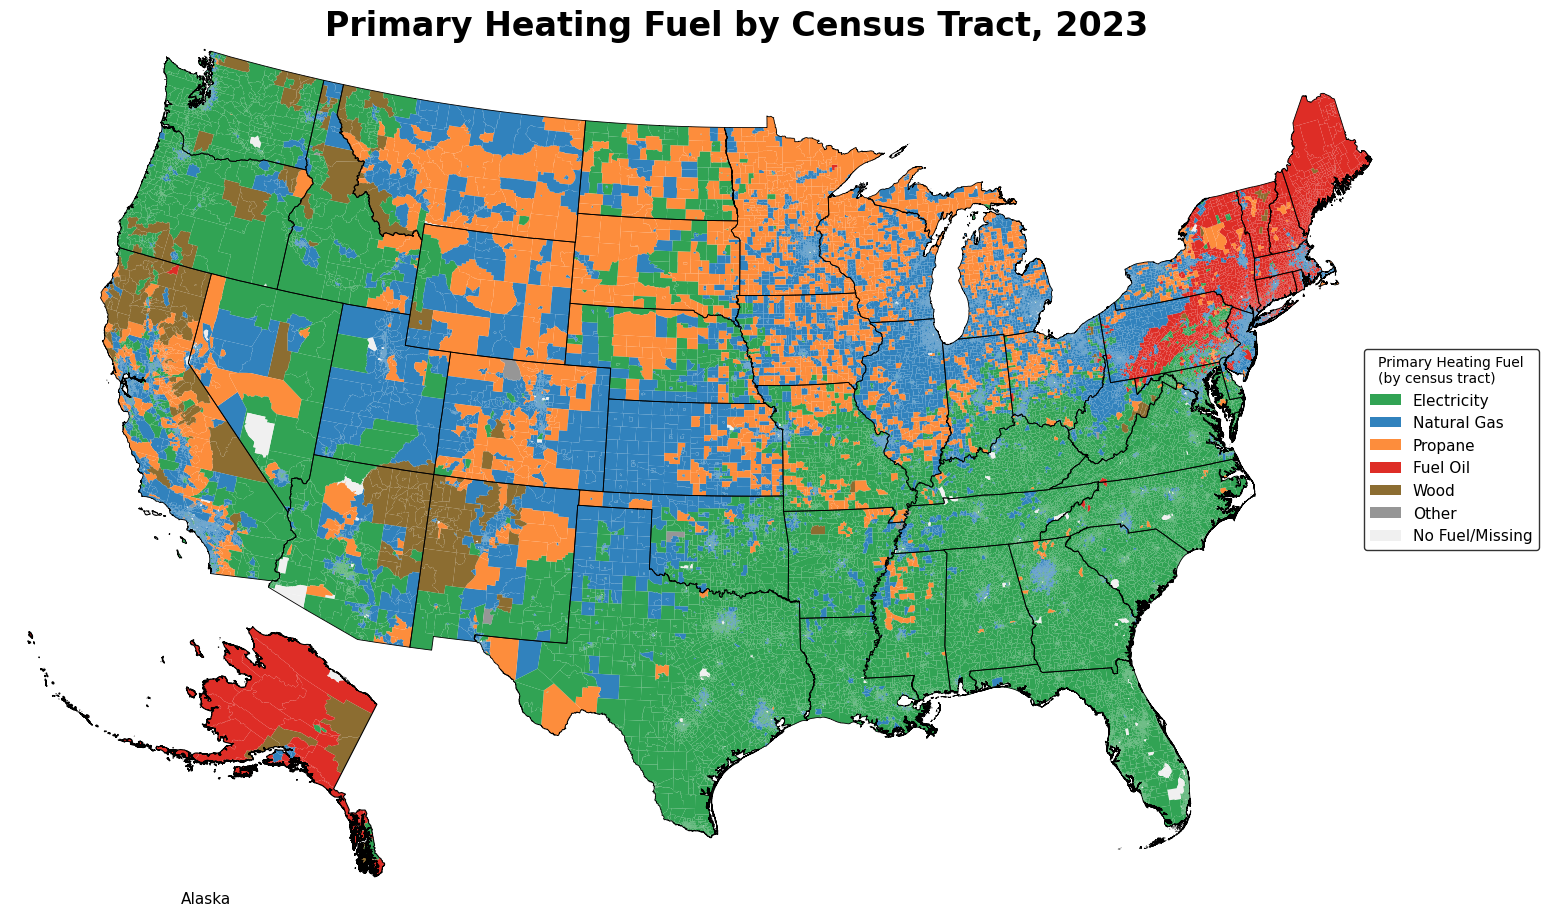


✓ MAP CREATION COMPLETE!
Saved PNG to: c:\Users\jorda\Desktop\Projects\Scott_Trane_Grand_Challege\joseph-heating-fuel-analysis\outputs\maps\heating_fuel_map_2023.png


In [6]:
'''
CREATE A SINGLE YEAR MAP

**WHAT THIS DOES:**
Creates a standalone map for one year (2023 in this example). Perfect for:
- Detailed examination of a specific time period
- Presentations or reports focusing on current data
- High-quality prints or posters

**CUSTOMIZATION OPTIONS:**
You can change these parameters:
- `year`: Which year to map (2015, 2020, or 2023)
- `show_plot=True`: Display in notebook (set to False if just saving files)
- `dpi=600`: Image resolution (higher = better quality but larger files)
- `verbose=True`: Show progress messages (helpful for troubleshooting)

**OUTPUT:**
- PNG file saved to your outputs/maps/ folder
'''

from scripts.visualize_geospatial_data import (
    create_heating_fuel_map, 
    create_heating_fuel_grid
)

print("=" * 70)
print("CREATING SINGLE YEAR MAP (2023)")
print("=" * 70)
print("\nThis will take 30-60 seconds depending on your computer...")
print("Progress: Rendering census tracts and state boundaries...\n")

# Create the map
png_path, pdf_path = create_heating_fuel_map(
    gdf_conus=gdf_2023_conus,         # Continental US data
    gdf_alaska=gdf_2023_alaska,       # Alaska data (for inset)
    gdf_states=gdf_states,            # State boundaries
    year=2023,                        # Year to display in title
    output_dir=MAPS_DIR,              # Where to save files
    show_plot=True,                   # Display in notebook
    dpi=600,                          # High resolution for print
    verbose=True                      # Show progress messages
)

print("\n" + "=" * 70)
print("✓ MAP CREATION COMPLETE!")
print("=" * 70)
print(f"Saved PNG to: {png_path}")

## Create Multi-Year Comparison Grid

**WHAT THIS DOES:**
Creates a single figure with three maps side-by-side, showing how heating fuel usage changed from 2015 → 2020 → 2023. This is the most powerful visualization for understanding trends.

**WHY THIS IS USEFUL:**
- Spot regional shifts in fuel usage
- Identify areas transitioning between fuel types
- See if policy changes correlate with heating fuel adoption
- Create publication-ready comparative figures

**LAYOUT DETAILS:**
- Three panels arranged horizontally
- Shared legend (same colors across all years)
- Alaska insets for each year
- Overall title spanning the full width
- Extra-wide figure size to accommodate all panels

**COMPARISON TIPS:**    
- Look for areas that change color between years (fuel transitions)
- Look for expansion of certain fuel types into new regions
- Look for stability vs. change in different parts of the country

CREATING MULTI-YEAR COMPARISON GRID (2015, 2020, 2023)

This creates ONE figure with THREE maps side-by-side.
  Note: This may take several minutes - rendering 250,000+ census tracts...

Data organized. Starting grid creation...


Creating 3-panel grid...
  Subplot dimensions: 28.00% × 70.00%

Rendering 3 maps...

  [1/3] Year 2015
  Rendering CONUS: 72,266 tracts
  Rendering Alaska: 167 tracts

  [2/3] Year 2020
  Rendering CONUS: 83,507 tracts
  Rendering Alaska: 177 tracts

  [3/3] Year 2023
  Rendering CONUS: 83,520 tracts
  Rendering Alaska: 177 tracts

  Saving to: c:\Users\jorda\Desktop\Projects\Scott_Trane_Grand_Challege\joseph-heating-fuel-analysis\outputs\maps
  ✓ Grid complete!


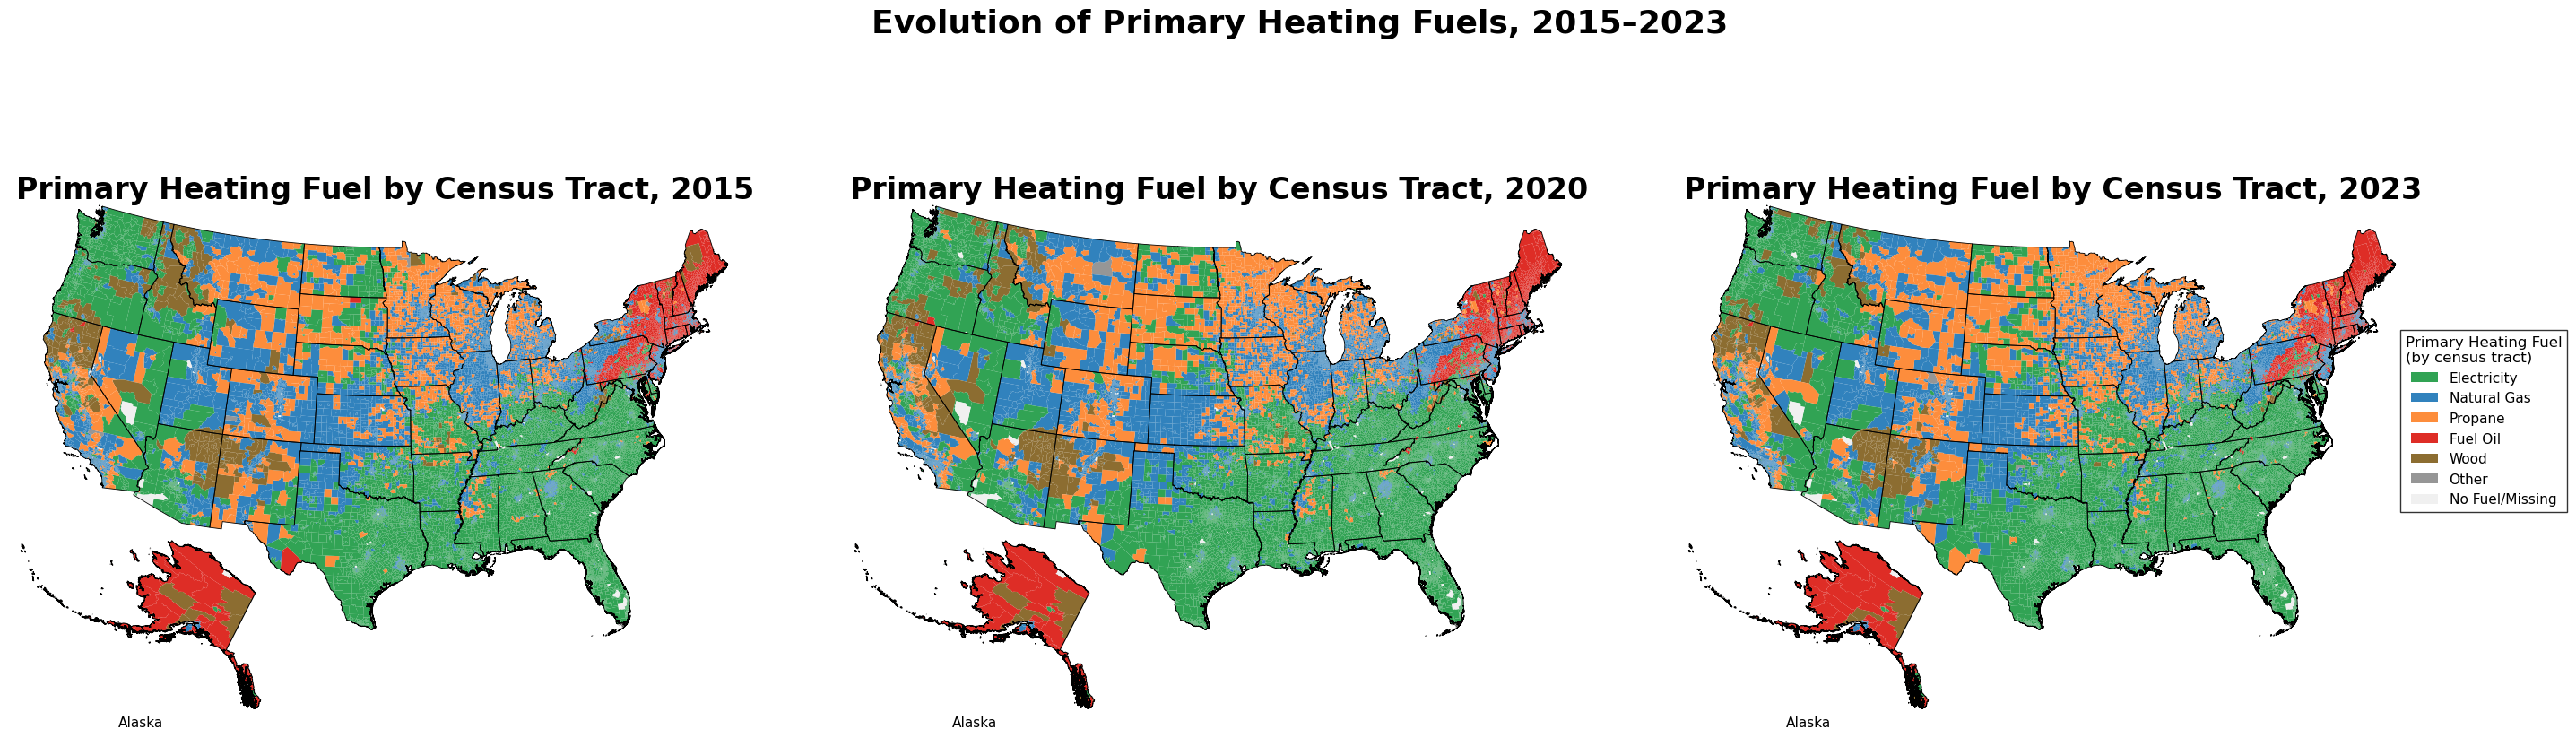


✓ GRID CREATION COMPLETE!
Saved PNG to: c:\Users\jorda\Desktop\Projects\Scott_Trane_Grand_Challege\joseph-heating-fuel-analysis\outputs\maps\heating_fuel_grid_2015_2023.png


In [7]:
# ============================================================================
# CREATE MULTI-YEAR COMPARISON GRID
# ============================================================================

print("=" * 70)
print("CREATING MULTI-YEAR COMPARISON GRID (2015, 2020, 2023)")
print("=" * 70)
print("\nThis creates ONE figure with THREE maps side-by-side.")
print("  Note: This may take several minutes - rendering 250,000+ census tracts...\n")

# Organize data into a nested dictionary
# Structure: {year: {'conus': gdf_conus, 'alaska': gdf_alaska}}
gdf_dict = {
    2015: {
        'conus': gdf_2015_conus,      # Continental US for 2015
        'alaska': gdf_2015_alaska      # Alaska for 2015
    },
    2020: {
        'conus': gdf_2020_conus,      # Continental US for 2020
        'alaska': gdf_2020_alaska      # Alaska for 2020
    },
    2023: {
        'conus': gdf_2023_conus,      # Continental US for 2023
        'alaska': gdf_2023_alaska      # Alaska for 2023
    }
}

print("Data organized. Starting grid creation...\n")

# Create the grid
png_path, pdf_path = create_heating_fuel_grid(
    gdf_dict=gdf_dict,                 # Our organized data
    gdf_states=gdf_states,             # State boundaries
    output_dir=MAPS_DIR,               # Save location
    years=[2015, 2020, 2023],          # Explicit left-to-right order
    include_alaska=True,               # Show Alaska insets
    figsize=(30, 10),                  # Wide figure (30" x 10")
    dpi=600,                           # Publication quality
    verbose=True                       # Show progress for each panel
)

print("\n" + "=" * 70)
print("✓ GRID CREATION COMPLETE!")
print("=" * 70)
print(f"Saved PNG to: {png_path}")

# Analysis Complete! 

You've just completed a full geospatial analysis pipeline:

1. **Loaded** raw census data (US census tracts across 3 time periods)
2. **Processed** data (calculated percentages, identified dominant fuels)
3. **Merged** tabular data with geographic boundaries
4. **Verified** data quality and distribution
5. **Created** publication-quality maps

## Your Output Files

All maps are saved in: `{MAPS_DIR}/`

**Individual Year Maps:**
- `heating_fuel_map_2015.png` and `.pdf`
- `heating_fuel_map_2020.png` and `.pdf`
- `heating_fuel_map_2023.png` and `.pdf`

**Comparison Grid:**
- `heating_fuel_grid_2015_2023.png` and `.pdf`

## Next Steps

### For Further Analysis:
- Modify parameters in cells above and re-run
- Change `year=2023` to `year=2015` for different time periods
- Adjust `figsize` or `dpi` for different output needs
- Add custom filtering (e.g., specific states only)

## Troubleshooting

**Map looks wrong?**
- Re-run Step 3 (prepare geodataframes) to ensure data merged correctly
- Check that all shapefiles loaded (should see ✓ messages)

**Files won't save?**
- Verify `MAPS_DIR` path exists: `os.path.exists(MAPS_DIR)`
- Check disk space (high-res maps can be 10-50 MB each)

**Want to customize colors?**
- Edit `FUEL_COLORS` dictionary in `scripts/process_data.py`
- Re-run the notebook from Step 3 onwards

---

**Questions?** Review the README.txt file or check function docstrings in the scripts folder.